<a href="https://colab.research.google.com/github/kimsh519/ms-ai-school/blob/main/230501_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os 
from os.path import join    #라이브러리 불러오기

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = iris.data
label = iris.target
columns = iris.feature_names
data = pd.DataFrame(data, columns = columns)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data[:5]  

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)
data[:5]  #2차원의 데이터로 변환

array([[-0.63070293,  0.10757791],
       [-0.62290494, -0.10425983],
       [-0.6695204 , -0.05141706],
       [-0.65415276, -0.10288487],
       [-0.64878806,  0.13348758]])

In [8]:
data.shape

(150, 2)

In [14]:
# K_means 모델의 활용
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3) #클러스터가 3개기 때문에 3

kmeans.fit(data)

KMeans(n_clusters=3)

In [15]:
cluster = kmeans.predict(data)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

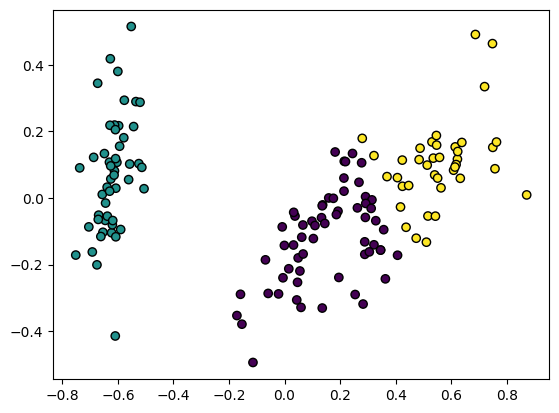

In [16]:
plt.scatter(data[:,0],data[:,1],c = cluster,linewidth = 1, edgecolor = 'k')

In [12]:
#Hierachical Cluster ,single clustering
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(linkage = 'single')

single_clustering.fit(data)
single_cluster = single_clustering.labels_

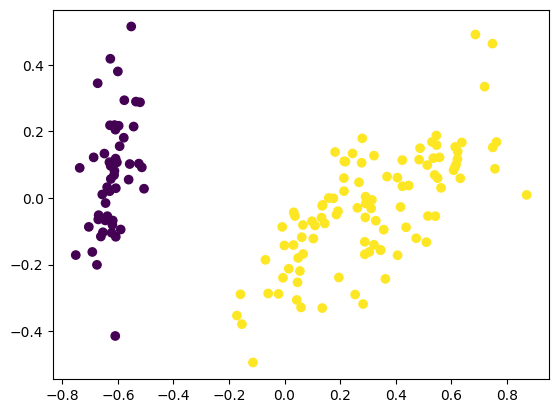

In [13]:
plt.scatter(data[:,0],data[:,1],c = single_cluster)

In [18]:
complete_clustering = AgglomerativeClustering(n_clusters = 3,linkage = 'complete')  #complete clustering
complete_clustering.fit(data)
complete_cluster = complete_clustering.labels_
complete_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1])

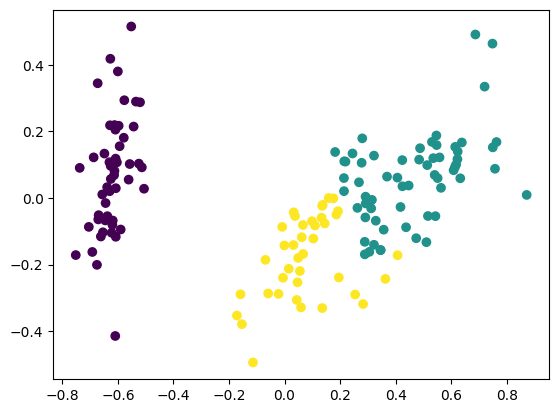

In [19]:
plt.scatter(data[:,0],data[:,1],c = complete_cluster)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [42.5, 42.5, 73.75, 73.75],
  [12.5, 12.5, 58.125, 58.125],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [112.5, 112.5, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [192.5, 192.5, 222.5, 222.5],
  [170.0, 170.0, 207.5, 207.5],
  [127.5, 127.5, 188.75, 188.75],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [250.0, 250.0, 272.5, 272.5],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [300.0, 300.0, 330.0, 330.0],
  [261.25, 261.25, 315.0, 31

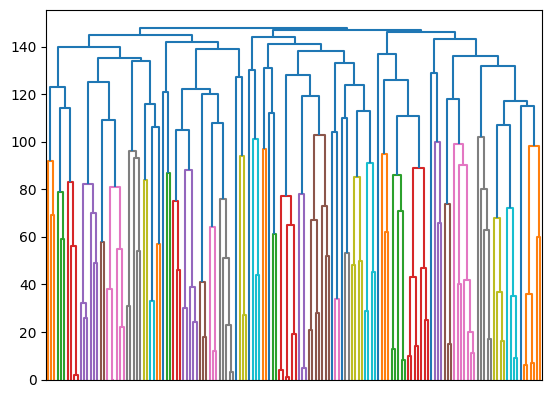

In [20]:
# 덴드로그램(dendrogram)
from scipy.cluster.hierarchy import dendrogram

# Hierarchical Cluster의 자식 노드
children = complete_clustering.children_
distance = np.arange(children.shape[0])

#각 클러스터 단계를 포함한 노드 수 계산
no_of_observations = np.arange(2,children.shape[0]+2) #+2 이유는 0~3 이면 갯수 4개이므로 +1, 최상위 노드를 위한 +1

linkage_matrix = np.column_stack([children,distance,no_of_observations]).astype(float)

#그리기
dendrogram(linkage_matrix, p = len(data),labels = complete_cluster, show_contracted = True, no_labels=True)

#x축 = data

In [21]:
# 가장 좋은 클러스터를 형성하는 클러스터의 수를 찾아보자

from sklearn.metrics import silhouette_score

best_n =  -1
best_score = -1

for n_cluster in range(2,11) :
  kmeans = KMeans(n_clusters=n_cluster)
  kmeans.fit(data)
  cluster = kmeans.predict(data)

#실루엣 점수를 본다
  score = silhouette_score(data,cluster)

  print('Cluster count : {}, Silhousette Score : {:.2f}'.format(n_cluster,score))
  if score > best_score :
    best_n = n_cluster
    best_score = score

print('\n--------------------------------------------------------------------\n')    
print('Best n_cluster : {} Silhousette Score : {:.2f}'.format(best_n,best_score))


Cluster count : 2, Silhousette Score : 0.67
Cluster count : 3, Silhousette Score : 0.57
Cluster count : 4, Silhousette Score : 0.53
Cluster count : 5, Silhousette Score : 0.44
Cluster count : 6, Silhousette Score : 0.43
Cluster count : 7, Silhousette Score : 0.43
Cluster count : 8, Silhousette Score : 0.43
Cluster count : 9, Silhousette Score : 0.43
Cluster count : 10, Silhousette Score : 0.43

--------------------------------------------------------------------

Best n_cluster : 2 Silhousette Score : 0.67
